Capstone Project: The Battle of neighbourhoods

Moving to Atlanta, Georgia, United States – A complete guide to be used by the users and help them decide the best place to reside in the city.

Business Proposal

Introduction:
    
Georgia is a state in the Southeastern Region of the United States. Georgia is the 24th-largest in area and 8th most populous of the 50 United States. As per the year 219, the population of Georgia as per 2019 was 10,617,423 according to the US Census Bureau. The capital of Georgia is Atlanta which is also the largest city in the state.

 The Atlanta metropolitan area, with an estimated population of more than 6 million people in 2019, is the 9th most populous metropolitan area in the United States and contains about 57% of Georgia's entire population and become the cultural and economic centre of the Southeast. Georgia is divided in counties and in cities. 
Atlanta is reputed for its impact on global commerce, finance, research, and education to name a few. Atlanta is now taking the centre stage and is becoming a major hub for being a great place to live, work and even to start a business for an entrepreneur.


The purpose of this Project will be aimed to explore all the major facilities available around the list of cities in Atlanta, Georgia to provide a deeper analysis to the end users through the final user-friendly reports. This will allow the interested set of people which can use the data and figures to take the decision on the optimum time to move to Atlanta. 


Problem Definition:
The main problem people face while relocating to new city is to take decision on what will be the optimal time for them to migrate to other state or countries. In this case I migrated to Atlanta, Georgia in 2020. So, creating this analysis will help prospective people to take a better decision selecting the best neighbourhoods for themselves in Atlanta. The best factors to consider while relocation will be where should someone rent an apartment, minimum crime index, presence of good educational institutions and presence of basic utilities like medical facilities.
 
Keeping this aspect in mind, the solution will be to develop a detailed analysis of the features and aspects for people migrating to Atlanta, and in search for the best neighbourhood as a comparative analysis. The feature includes median housing price, presence of better schools, restaurants, medical units according to a better rating which will enable in making a perfect decision for themselves. 

It will also provide information on the map with good index in schools, restaurants and medical facilities in Atlanta and will be clustered by venues.

<b>Importing libraries and scraping wikipedia to extract main base data of Cities and Counties in Atlanta, Georgia<b>

In [90]:
import requests # library to handle requests

from bs4 import BeautifulSoup 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import pandas as pd

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv

import io

from pathlib import Path

print('Libraries imported.')

Libraries imported.


In [91]:
# Extract and Generate Georgia City dataset

url_city = 'https://en.wikipedia.org/wiki/List_of_municipalities_in_Georgia_(U.S._state)'

resp=requests.get(url_city) 

#http_respone 200 means OK status 
if resp.status_code==200: 
    print("Successfully opened the web page") 
    
    # we need a parser,Python built-in HTML parser is enough . 
    soup=BeautifulSoup(resp.text,'html.parser')     
  
    # table is the list which contains all the text 
    table=soup.findAll("table",{"class":"wikitable sortable"})

else: 
    print("Error")

Successfully opened the web page


<b>Create dataframe based in the scrape table, setting City , County , Population and Density<b>

In [92]:
df_City = pd.read_html(str(table[1]))
df_City = df_City[0].dropna(axis=0)
column_names = ['City','Type','County','Population','Population_2000','Change','Land','Density','Extr']
df_City.columns = column_names
df_City.drop(['Type', 'Population_2000', 'Change', 'Density', 'Extr'], axis=1, inplace=True)
df_City['City'] = df_City['City'].replace("†", " ",regex=True)
df_City.head()

,City,County,Population,Land
0,Abbeville,Wilcox,2908,3.06
1,Acworth,Cobb,20425,8.24
2,Adairsville,Bartow,4648,9.11
3,Adel,Cook,5334,8.06
4,Adrian,"Emanuel, Johnson",664,1.37


<b>Here we will merge Coordinates data with our current City data to include Latitud and Longitud data from the Atlanta Cities. Since google geocoder library is having issues we built a file with coordinates using Google Maps that will be used for this purpose<b>

In [95]:
df_coord = pd.read_csv('C:/Users/RohitSingh/Desktop/DATA_SCIENCE/Geospatial_Coordinates.csv')
df_coord.head()

,City,County,Latitude,Longitude,Google URL
0,Abbeville,Fulton,31.99,-83.31,https://www.google.com/maps/d/viewer?ie=UTF8&s...
1,Acworth,Fulton,34.06,-84.67,https://www.google.com/maps/d/viewer?ie=UTF8&s...
2,Adairsville,Fulton,34.37,-84.92,https://www.google.com/maps/d/viewer?ie=UTF8&s...
3,Adel,Fulton,31.13,-83.43,https://www.google.com/maps/d/viewer?ie=UTF8&s...
4,Adrian,Fulton,32.53,-82.59,https://www.google.com/maps/d/viewer?ie=UTF8&s...


In [96]:
df_georgia = df_City.merge(df_coord, how='inner', left_on='City', right_on='City')
df_georgia.drop(['Google URL'], axis=1, inplace=True)
#df_georgia[["Latitude"]] = df_georgia[["Latitude"]].astype("float")
#df_georgia[["Longitude"]] = df_georgia[["Longitude"]].astype("float")
df_georgia.head()

,City,County_x,Population,Land,County_y,Latitude,Longitude
0,Acworth,Cobb,20425,8.24,Fulton,34.06,-84.67
1,Adairsville,Bartow,4648,9.11,Fulton,34.37,-84.92
2,Adrian,"Emanuel, Johnson",664,1.37,Fulton,32.53,-82.59
3,Ailey,Montgomery,432,2.01,Fulton,32.19,-82.57
4,Alapaha,Berrien,668,1.03,Fulton,31.38,-83.22


<b>Show final results<b>

In [97]:
df_georgia.shape

(36, 7)

In [98]:
df_atlanta = df_georgia[(df_georgia['County_x'].str.contains('Fulton')) | (df_georgia['County_x'].str.contains('Cobb')) | (df_georgia['County_x'].str.contains('DeKalb')) | (df_georgia['County_x'].str.contains('Clayton')) | (df_georgia['County_x'].str.contains('Fayette')) | (df_georgia['County_x'].str.contains('Coweta')) | (df_georgia['County_x'].str.contains('Cherokee')) | (df_georgia['County_x'].str.contains('Forsyth')) | (df_georgia['County_x'].str.contains('Gwinnett'))].reset_index()
df_atlanta.shape
df_atlanta

,index,City,County_x,Population,Land,County_y,Latitude,Longitude
0,0,Acworth,Cobb,20425,8.24,Fulton,34.06,-84.67
1,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27
2,18,Atlanta,"Fulton (seat), DeKalb",420003,133.15,Cobb County,33.25,-81.23
3,20,Auburn,"Barrow, Gwinnett",6887,6.45,Cobb County,30.75,-84.48
4,21,Austell,"Cobb, Douglas",6581,5.97,Cobb County,33.36,-82.07
5,24,Avondale Estates,DeKalb,2960,1.14,Cobb County,34.50,-83.20
6,27,Ball Ground,Cherokee,1433,5.81,Clayton,30.90,-84.57
7,31,Berkeley Lake,Gwinnett,1574,1.08,Clayton,31.76,-82.35


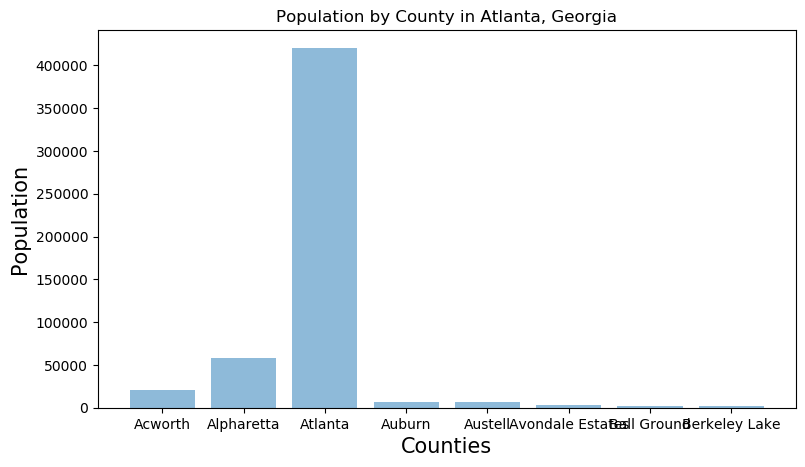

In [122]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Population by County in Atlanta, Georgia')
#On x-axis
plt.xlabel('Counties', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
objects = ('Acworth', 'Alpharetta', 'Atlanta', 'Auburn', 'Austell', 'Avondale Estates','Ball Ground','Berkeley Lake')
y_pos = np.arange(len(objects))
performance = [20425,57551,420003,6887,6581,2960,1433,1574]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Population')
plt.title('Population by County in Atlanta, Georgia')

plt.show()

<b>Methodology <b>

To compare the similarities of cities, I will explore Cities, segment them, and group them into clusters to find similar cities regards venues category in Atlanta, Georgia. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: k-means clustering algorithm.

<b>Let's get the geographical coordinates of Atlanta, Georgia<b>

In [123]:
address = 'Atlanta, Georgia'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Atlanta, Georgia are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Atlanta, Georgia are 33.7490987, -84.3901849.


<b>Create a map of Atlanta, Georgia with Cities superimposed on top<b>

In [124]:
map_georgia = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, county, city in zip(df_atlanta['Latitude'], df_atlanta['Longitude'], df_atlanta['County_x'], df_atlanta['City']):
    label = '{}, {}'.format(city, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_georgia)  
    
map_georgia

In [125]:
CLIENT_ID = 'AD112G5O41QUEUW12AKUPUE2OXOENVBLHC4SNMFTRGI4QCF' # your Foursquare ID
CLIENT_SECRET = '2OXO50IE3F1T3HCGC0JDEWWOW2KNYC5VZ2UQHQZHK4OHXMHJC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AD112G5O41QUEUW12AKUPUE2OXOENVBLHC4SNMFTRGI4QCF
CLIENT_SECRET:2OXO50IE3F1T3HCGC0JDEWWOW2KNYC5VZ2UQHQZHK4OHXMHJC


<b>Let's explore the first City in our dataframe<b>

In [126]:
df_atlanta.loc[0, 'City']

'Acworth'

<b>Get the Cities's latitude and longitude values.<b>

In [127]:
City_latitude = df_atlanta.loc[0, 'Latitude'] # City latitude value
City_longitude = df_atlanta.loc[0, 'Longitude'] # City longitude value

City_name = df_atlanta.loc[0, 'City'] # City name

print('Latitude and longitude values of {} are {}, {}.'.format(City_name, 
                                                               City_latitude, 
                                                               City_longitude))

Latitude and longitude values of Acworth are 34.06, -84.67.


<b>Now, let's get the top 100 venues that are within a radius of 2000 meters.<b>

<b>First, create the GET request URL.<b>

In [168]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/search?ll=34.06,-84.67&client_id=AD112G5O41QUEUW12AKUPUE2OXGOENVBLHC4SNMFTGRI4QCF&client_secret=2OX50IE3F1T3HCGC0JDEWWOW2KNYC5VZ2UQHQZHK4OHMXHJC&v=20200605'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    City_latitude, 
    City_longitude, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee6ad11b440000a496092ab'},
 'response': {'venues': [{'id': '581e61c14ed61041c152900d',
    'name': "Doro's Italian Restaurant",
    'location': {'address': '3979 S Main St',
     'lat': 34.062126,
     'lng': -84.66617,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.062126,
       'lng': -84.66617}],
     'distance': 425,
     'postalCode': '30101',
     'cc': 'US',
     'city': 'Acworth',
     'state': 'GA',
     'country': 'United States',
     'formattedAddress': ['3979 S Main St',
      'Acworth, GA 30101',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d110941735',
      'name': 'Italian Restaurant',
      'pluralName': 'Italian Restaurants',
      'shortName': 'Italian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '384096',
     'url': 'https://www.grubhub.com/restaurant/doros-italian-restaurant-4417

In [169]:
venues=results['response']['venues']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['id', 'name', 'categories', 'referralId', 'hasPerk', 'location.address',
       'location.lat', 'location.lng', 'location.labeledLatLngs',
       'location.distance', 'location.postalCode', 'location.cc',
       'location.city', 'location.state', 'location.country',
       'location.formattedAddress', 'delivery.id', 'delivery.url',
       'delivery.provider.name', 'delivery.provider.icon.prefix',
       'delivery.provider.icon.sizes', 'delivery.provider.icon.name',
       'venuePage.id', 'location.crossStreet'],
      dtype='object')

<b>Define Function to read items from Foursquare<b>

In [170]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [205]:
venues = results['response']['venues']
    
nearby_venues = json_normalize(venues) # flatten JSON

#filter columns
nearby_venues.drop(['id', 'referralId', 'hasPerk', 'location.labeledLatLngs'], axis=1, inplace=True)
nearby_venues.head()

# filter the category for each row
nearby_venues['venues.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()


,name,categories,address,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,id,url,name,prefix,sizes,name,id,crossStreet,categories
0,Doro's Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",3979 S Main St,34.062126,-84.666170,425,30101,US,Acworth,GA,United States,"[3979 S Main St, Acworth, GA 30101, United Sta...",384096,https://www.grubhub.com/restaurant/doros-itali...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN,NaN,Italian Restaurant
1,Ridge mill,"[{'id': '4f2a210c4b9023bd5841ed28', 'name': 'H...",NaN,34.097434,-84.621326,6124,30102,US,Acworth,GA,United States,"[Acworth, GA 30102, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Housing Development
2,carol the corolla,"[{'id': '4f2a23984b9023bd5841ed2c', 'name': 'M...",NaN,34.062809,-84.675987,634,30101,US,Acworth,GA,United States,"[Acworth, GA 30101, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moving Target
3,Center Street Tavern,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",4381 Senator Richard B Russell Sq,34.065518,-84.677706,939,30101,US,Acworth,GA,United States,"[4381 Senator Richard B Russell Sq, Acworth, G...",NaN,NaN,NaN,NaN,NaN,NaN,53888042,NaN,American Restaurant
4,Acworth Beach/Cauble Park,"[{'id': '4bf58dd8d48988d1e2941735', 'name': 'B...",Downtown Acworth,34.061959,-84.669333,226,30102,US,Main St,GA,United States,"[Downtown Acworth, Main St, GA 30102, United S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Beach


In [206]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

30 venues were returned by Foursquare.


<b>Exploring Cities in Atlanta, Georgia<b>

In [219]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?ll=34.06,-84.67&client_id=AD112G5O41QUEUW12AKUPUE2OXGOENVBLHC4SNMFTGRI4QCF&client_secret=2OX50IE3F1T3HCGC0JDEWWOW2KNYC5VZ2UQHQZHK4OHMXHJC&v=20200605'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
nearby_venues.head()

,city
0,Acworth
1,Acworth
2,Acworth
3,Acworth
4,Main St


In [249]:
georgia_venues = df_atlanta['City']
georgia_venues

0             Acworth
1          Alpharetta
2             Atlanta
3              Auburn
4             Austell
5    Avondale Estates
6         Ball Ground
7       Berkeley Lake
Name: City, dtype: object

In [250]:
print(georgia_venues.shape)

(8,)


In [253]:
nearby_venues.groupby('city').count()

""
city
Acworth
Cobb County
Main St


Let's find out how many unique categories can be curated from all the returned venues

In [261]:
print('There are {} uniques categories.'.format(len(georgia_venues.unique())))

There are 8 uniques categories.


<b>Analysis<b>

Once having all our venues categorized , we wil proceed to group them by city and select the venues with most occureence. It will allow us to show which venues pre-domine in the cities to help to identify which options can be taken base on that. Custering will help to split the groups and see which of them have similarities and will help for decision too.

In [274]:
# one hot encoding
#georgia_onehot = pd.get_dummies(georgia_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
georgia_onehot = georgia_venues

# move neighborhood column to the first column
#fixed_columns = [georgia_onehot.columns[-1]] + list(georgia_onehot.columns[:-1])
#georgia_onehot = georgia_onehot[fixed_columns]

georgia_onehot.head()

0       Acworth
1    Alpharetta
2       Atlanta
3        Auburn
4       Austell
Name: City, dtype: object

In [282]:
georgia_onehot.shape

(8,)

<b>Next, let's group rows by City and by taking the mean of the frequency of occurrence of each category<b>

In [286]:
georgia_grouped = georgia_onehot.reset_index()
georgia_grouped

,index,City
0,0,Acworth
1,1,Alpharetta
2,2,Atlanta
3,3,Auburn
4,4,Austell
5,5,Avondale Estates
6,6,Ball Ground
7,7,Berkeley Lake


In [287]:
georgia_grouped.shape

(8, 2)

Cities along with the top 5 most common venues

In [289]:

num_top_venues = 5

for hood in georgia_grouped['City']:
    print("----"+hood+"----")

----Acworth----
----Alpharetta----
----Atlanta----
----Auburn----
----Austell----
----Avondale Estates----
----Ball Ground----
----Berkeley Lake----


<b>Display the TOP 10 Most Common venues near by City<b>

In [291]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = georgia_grouped['City']



city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alpharetta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlanta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Auburn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Austell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Cluster Cities<b>

apply k-means to cluster the city into 5 clusters and add in a dataframe.

In [292]:
from sklearn.cluster import KMeans
import sklearn.cluster.k_means_
km = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1, 
  verbose=True)

In [293]:

kclusters = 6
georgia_grouped_clustering = georgia_grouped.drop('City', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(georgia_grouped_clustering)
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[3 1 1 4 0 5 2 2]
8


In [294]:

city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
georgia_merged = df_atlanta
georgia_merged = georgia_merged.join(city_venues_sorted.set_index('City'), on='City')
georgia_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
georgia_merged.head(10) # check the last columns!
#print(georgia_merged.dtypes)

,index,City,County_x,Population,Land,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Acworth,Cobb,20425,8.24,Fulton,34.06,-84.67,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,Atlanta,"Fulton (seat), DeKalb",420003,133.15,Cobb County,33.25,-81.23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,Auburn,"Barrow, Gwinnett",6887,6.45,Cobb County,30.75,-84.48,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,Austell,"Cobb, Douglas",6581,5.97,Cobb County,33.36,-82.07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,24,Avondale Estates,DeKalb,2960,1.14,Cobb County,34.50,-83.20,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,27,Ball Ground,Cherokee,1433,5.81,Clayton,30.90,-84.57,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,31,Berkeley Lake,Gwinnett,1574,1.08,Clayton,31.76,-82.35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualize the resulting clusters

In [295]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(georgia_merged['Latitude'], georgia_merged['Longitude'], georgia_merged['City'], georgia_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<b>Examine Clusters<b>

In [297]:
df_cl0= georgia_merged.loc[georgia_merged['Cluster Labels'] == 0, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl0.head()

,City,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Austell,Cobb County,33.36,-82.07,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> Cluster1<b>

In [298]:
df_cl1=georgia_merged.loc[georgia_merged['Cluster Labels'] == 1, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl1.head()

,City,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Alpharetta,Fulton,34.07,-84.27,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Atlanta,Cobb County,33.25,-81.23,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> Cluster2<b>

In [299]:
df_cl2 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 2, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl2.head()

,City,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Ball Ground,Clayton,30.90,-84.57,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Berkeley Lake,Clayton,31.76,-82.35,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> Cluster3<b>

In [300]:
df_cl3 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 3, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl3.head()

,City,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Acworth,Fulton,34.06,-84.67,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Cluster4<b>

In [301]:
df_cl4 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 4, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl4.head()

,City,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Auburn,Cobb County,30.75,-84.48,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Cluster5<b>

In [302]:
df_cl5 = georgia_merged.loc[georgia_merged['Cluster Labels'] == 5, georgia_merged.columns[[1] + list(range(5, georgia_merged.shape[1]))]]
df_cl5.head()

,City,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Avondale Estates,Cobb County,34.5,-83.2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
df_school = pd.read_csv('C:/Users/RohitSingh/Desktop/DATA_SCIENCE/Georgia_school_dataset.csv')
df_univ = pd.read_csv('C:/Users/RohitSingh/Desktop/DATA_SCIENCE/Georgia_University_dataset.csv')
df_school

,SCHOOLS,County_x
0,ABC,Dekalb
1,XYZ,Fulton
2,SDF,Coweta
3,DFG,Glynn
4,GHJ,Fulton
5,NBV,Fulton
6,SDF,Fulton
7,GHJ,Fulton
8,FRE,Fulton
9,QWE,Dekalb


<b>Results and Discussions<b>

After the analysis done, we can determine that the list of posibilities availables in each cluster allow to select and determine which options we have when we want to select a particular place. Definitively count with the collection of venues allow to select and consider which will be the most important per each person in the moment to decide what city choose to live. Finally, our results show that the Cluster 1, follow the initial requirements. All Cities in CLUSTER 1 have Restarurants, Clothes Places , Parks and transportantion. On the other hand , the plots visualize , the view of the ranking of the schools and universities and house prices that will complement the variables to consider in the decision time. Reviewing the Cluster 1, we see that 3 cities are the most valuables since are located in Fulton or Cobb county(next to Fulton) , schools in those cities are in the top average of ranking in schools and universities too. The rent price of house is aprox 1200 US$.

In [322]:
#df_georgia[(df_georgia['County'].str.contains('Fulton'))
Place_tolive = georgia_merged[(georgia_merged['City'].str.contains('Acworth')) | (georgia_merged['City'].str.contains('Auburn')) | (georgia_merged['City'].str.contains('Sandy Springs'))]
Place_tolive

,index,City,County_x,Population,Land,County_y,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Acworth,Cobb,20425,8.24,Fulton,34.06,-84.67,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,Auburn,"Barrow, Gwinnett",6887,6.45,Cobb County,30.75,-84.48,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
df_rs_school = df_atlanta.merge(df_school, how='left', left_on='County_x', right_on='County_x')
df_rs_school.head()

,index,City,County_x,Population,Land,County_y,Latitude,Longitude,SCHOOLS
0,0,Acworth,Cobb,20425,8.24,Fulton,34.06,-84.67,NaN
1,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,XYZ
2,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,GHJ
3,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,NBV
4,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,SDF


In [328]:
df_rs_university = df_atlanta.merge(df_univ, how='left', left_on='County_x', right_on='County_x')
df_rs_university.head()

,index,City,County_x,Population,Land,County_y,Latitude,Longitude,SCHOOLS
0,0,Acworth,Cobb,20425,8.24,Fulton,34.06,-84.67,NaN
1,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,University of Georgia
2,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,GIT
3,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,Agnes Scott
4,8,Alpharetta,Fulton,57551,26.91,Fulton,34.07,-84.27,Emory University


County

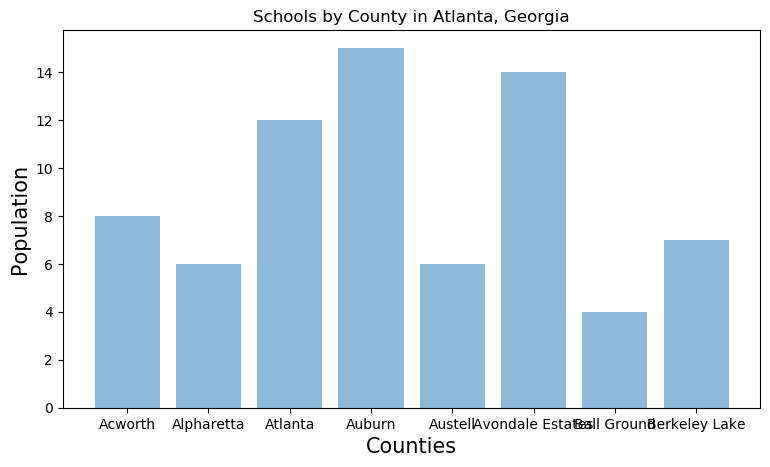

In [345]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Schools by County in Atlanta, Georgia')
#On x-axis
plt.xlabel('Counties', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
objects = ('Acworth', 'Alpharetta', 'Atlanta', 'Auburn', 'Austell', 'Avondale Estates','Ball Ground','Berkeley Lake')
y_pos = np.arange(len(objects))
performance = [8,6,12,15,6,14,4,7]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Population')
plt.title('Schools by County in Atlanta, Georgia')

plt.show()

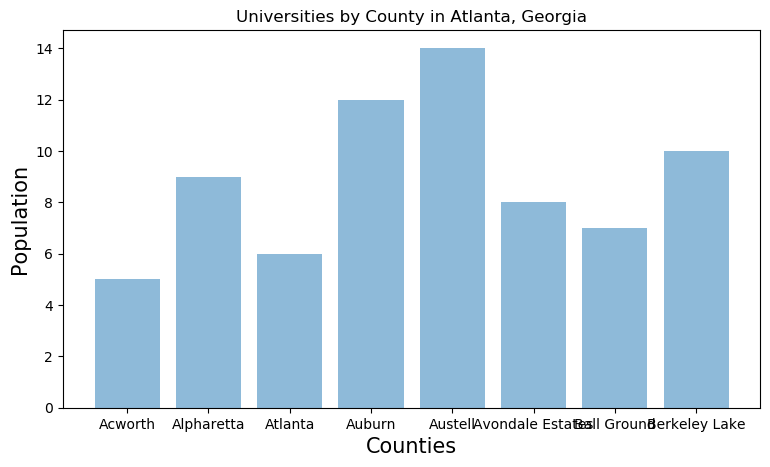

In [347]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Universities by County in Atlanta, Georgia')
#On x-axis
plt.xlabel('Counties', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
objects = ('Acworth', 'Alpharetta', 'Atlanta', 'Auburn', 'Austell', 'Avondale Estates','Ball Ground','Berkeley Lake')
y_pos = np.arange(len(objects))
performance = [5,9,6,12,14,8,7,10]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Population')
plt.title('Universities by County in Atlanta, Georgia')

plt.show()

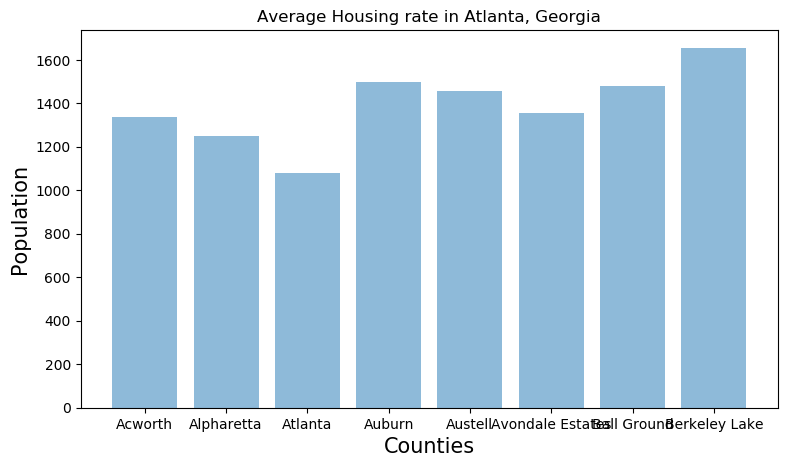

In [349]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average Housing rate in Atlanta, Georgia')
#On x-axis
plt.xlabel('Counties', fontsize = 15)
#On y-axis
plt.ylabel('Population', fontsize=15)
#giving a bar plot
objects = ('Acworth', 'Alpharetta', 'Atlanta', 'Auburn', 'Austell', 'Avondale Estates','Ball Ground','Berkeley Lake')
y_pos = np.arange(len(objects))
performance = [1339,1250,1080,1500,1455,1356,1478,1654]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Population')
plt.title('Average Housing rate in Atlanta, Georgia')

plt.show()

<b> Conclusion<b>

We can conclude that we have achieved the goal of this project. Following the analysis learned in the course and applying it using K-means cluster algorithm that helped us to group all the venues provided by Foursquare and what help us to determine the options that will be considered in the decision making.

As we show in our Results section , CLUSTER 1 is which follow the requirements defined in the Defition of the problem,. This consider initial requirements about the categories of the venues (Restaurants, Clothes places, Parks) and also location sitting in Fulton County or next to it. This analysis was complemented with the plot information. Particularly, analizing option in Cluster 1 , I most inclided by Cities as Marieta, Kennessaw and Sandy Springs since those cities are located in Fulton and/or Cobb Counties (last one next to Fulton). And these are in the top average of the school and univerities. Rent prices of houses are aprox 1200 US$ which is the average of those cities.

Finally, just say thanks for all what we learn in this path!